# 1. Neural Network(인공신경망) 과제

- 생물학적 신경망 네트워크를 기계학습, 인지과학으로 수학적으로 표현한 모델
- 인공 신경망은 노드들의 그룹으로 연결되어 있고 가중치를 조절해 모델을 생성함

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

import warnings

# 특정 경고 메시지를 무시하도록 설정
warnings.filterwarnings("ignore", category=FutureWarning)  # FutureWarning 경고 무시
# 경고 무시 설정 해제 (선택사항)
#warnings.filterwarnings("default", category=FutureWarning) 

# 데이터 scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할
from sklearn.model_selection import train_test_split
# 분류 NN
from sklearn.neural_network import MLPClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

### 데이터 구성하기 

In [2]:
df_raw = pd.read_csv('./datasets/유방암.csv',encoding='euc-kr')
display(df_raw.head())
display(df_raw.info())

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

None

### 데이터 구성하기 - 결측치 확인 및 처리 

In [3]:
df_raw.isnull().sum(axis=0).sort_values(ascending=False).head()

diagnosis               0
compactness_error       0
worst_symmetry          0
worst_concave_points    0
worst_concavity         0
dtype: int64

In [4]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,320.0,15.709703,3.745788,7.691000,13.050000,15.125000,18.520000,28.11000
mean_texture,320.0,20.323250,4.150729,9.710000,17.460000,20.215000,22.500000,39.28000
mean_perimeter,320.0,103.050469,25.835984,47.920000,84.845000,100.100000,121.550000,188.50000
mean_area,320.0,807.735937,391.969297,170.400000,523.900000,713.050000,1075.250000,2501.00000
mean_smoothness,320.0,0.099358,0.014249,0.052630,0.090240,0.098570,0.108050,0.16340
mean_compactness,320.0,0.123252,0.057207,0.026750,0.081132,0.115300,0.155650,0.34540
mean_concavity,320.0,0.122144,0.084822,0.000000,0.052770,0.110850,0.169550,0.42680
mean_concave_points,320.0,0.066977,0.041732,0.000000,0.029538,0.065265,0.091777,0.20120
mean_symmetry,320.0,0.186772,0.027485,0.127400,0.166900,0.184650,0.202700,0.30400
mean_fractal_dimension,320.0,0.062679,0.007190,0.049960,0.057450,0.061445,0.066705,0.09744


In [5]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

### 데이터 전처리
    - 목표변수/ 설명변수 분리

In [6]:
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_음성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,1
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,0
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,1
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,0
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,0


### test / train 데이터 분할

In [7]:
# 데이터 분리 : 설명변수, 목표변수 구분
df_raw_x = df_raw_dummy.drop("diagnosis_음성", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["diagnosis_음성"]
display("설명변수:", df_raw_x.head())
display("목표변수:", df_raw_y.head())

'설명변수:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'목표변수:'

0    1
1    0
2    1
3    0
4    0
Name: diagnosis_음성, dtype: uint8

### 데이터 scaling
    - 연속형 설명변수 scaling 변환

In [8]:
# 연속형 설명변수 scaling 변환
# 연속형 변수 선택 : select_dtypes = 'oject' 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# 변수명 저장
v_feature_names = df_raw_x_num.columns
# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns = v_feature_names)
display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:", df_x_scaled.head())

'Scale 변환 전:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'Scale 변환 후:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


### 데이터 구성하기 - 데이터 전처리
    - 데이터 분할 : 6:4 분할

In [9]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_scaled, df_raw_y
     ,test_size = 0.4, random_state = 1234)

print("분할된 Train Data : {}".format(df_train_x.shape))
print("분할된 Test Data : {}".format(df_test_x.shape))

분할된 Train Data : (192, 30)
분할된 Test Data : (128, 30)


### custum 되지않은 기본 NN 모델 생성
     - 생성된 모델의 옵션 확인

In [10]:
nn_uncust = MLPClassifier(random_state=1234)
# hiddenlayer_sizes = (100, 100) 변경 (은닉층 2개, 각 은닉층 노드 100개)
nn_uncust.fit(df_train_x, df_train_y)
# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.953


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- scailing 된 데이터의 custum되지 않은 MLP 모델의 정확도는 train 99.5% , test 95.3% 로 높은 수준이다.

In [11]:
print(nn_uncust.get_params().keys())
print(nn_uncust.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


### MLPClassifier 모델 Parameter

### Hidden Layer : 은닉층 변경에 따른 모델 성능

- Hidden Layer 는 은닉층 개수와 층별 노드 개수를 지정 -> 은닉층이 복잡할수록 모델의 과대적합 경향성 나타남

In [12]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_hidden = [5 * hidden for hidden in range(1, 21)] # 은닉층 노드

print(para_hidden)

for v_hidden in para_hidden :
# nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state=1234) 은닉층 :1D
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state=1234) # 은닉층 : 2D
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

# 은닉층별 정확도
df_accuracy_hidden.round(3)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-pac

,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.964,0.883
1,10,0.990,0.930
2,15,0.995,0.938
3,20,0.995,0.953
4,25,0.995,0.953
5,30,0.995,0.945
6,35,1.000,0.945
7,40,0.995,0.953
8,45,1.000,0.945
9,50,1.000,0.945


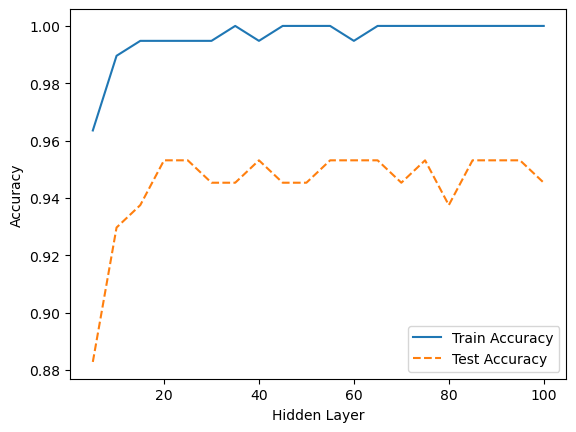

In [13]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy");plt.xlabel("Hidden Layer")
plt.legend()

- Hidden Layer(은닉층) 변경에 따른 모델 성능이 구조가 복잡할수록 모델의 과대적합 경향성이 나타나고 test 데이터에서는 성능이 개선되는 경향이 있음
- train 데이터가 15에서 과적합 경향을 보임
- test 모델의 정확도 변동은 과적합 경향성을 고려하여 Hidden layer = 20 을 선택함

### Activation : 활성화 함수에 따른 모델 성능

- activation function : 입력층 또는 이전의 은닉층의 정보(가중 합)을 다음 층으로의 출력값을 결정하는 함수를 의미
- 입력층 또는 은닉층 정보(가중합) 활성화 방식에 따라 자료 특성에 영향을 많이 받음

In [14]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (20, 20), random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

# Activation Function별 정확도
df_accuracy_function.round(3)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.979,0.930
1,tanh,0.995,0.945
2,relu,0.995,0.953


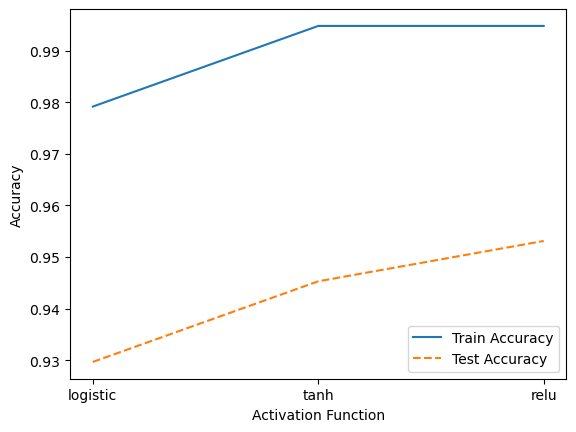

In [15]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy");plt.xlabel("Activation Function")
plt.legend()

- logistic , tanh, relu 에서 test정확도가 0.930, 0.945, 0.953 으로 나타남
- relu 함수를 적용한 모델에서 test 정확도가 가장 높음(일반적으로 scale 적용 데이터의 경우 relu 함수가 정확도가 좋음)

### Solver : 가중치 최적화에 따른 모델 성능

- 신경망 모델의 학습 결과에 따른 손실함수 값을 최소화하는 하이퍼 파라미터 탐색 및 최적화
- 파라미터 초기값 설정 및 탐색 방법에 따라 모델 성능의 차이가 큼

In [16]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# solver로 변경
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = "relu", hidden_layer_sizes = (20, 20), random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

# Activation solver별 정확도
df_accuracy_solver.round(3)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.969
1,sgd,0.974,0.914
2,adam,0.995,0.953


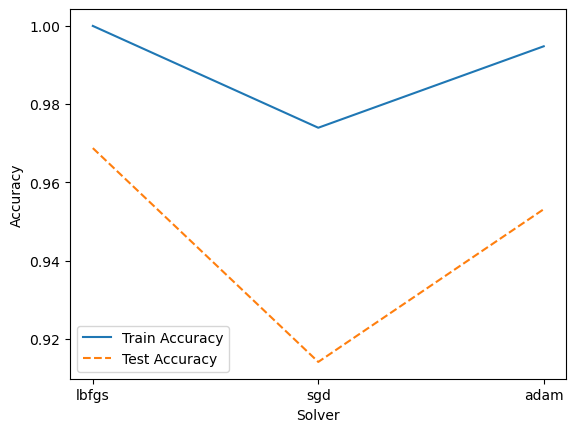

In [17]:
# 모델 정확도 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy");plt.xlabel("Solver")
plt.legend()

- train 데이터에서 과적합 경향이 보이고 test 정확도가 lbfgs 에서 가장 높으나
- 일반적으로 모델의 성능이 우수하다고 알려진 adam 함수를 선택함

### Mini Batch : 미니배치에 따른 모델 성능

- 전체 학습 데이터를 배치 크기로 등분하여 각각의 배치 데이터 별로 순차적으로 학습하는 방법
- full-batch GD(배치 크기-전체), batch SGD(배치 크기-지정) > SGD(배치 크기 = 1)

In [18]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# Mini Batch로 변경
para_batch = [20 * batch for batch in range(1, 20)]

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "relu",
                       hidden_layer_sizes = (20, 20), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

# Activation batch별 정확도
df_accuracy_batch.round(3)

[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380]


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-pac

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.000,0.945
1,40,1.000,0.945
2,60,1.000,0.945
3,80,1.000,0.945
4,100,0.995,0.953
5,120,0.995,0.953
6,140,0.995,0.953
7,160,0.995,0.953
8,180,0.995,0.961
9,200,0.995,0.953


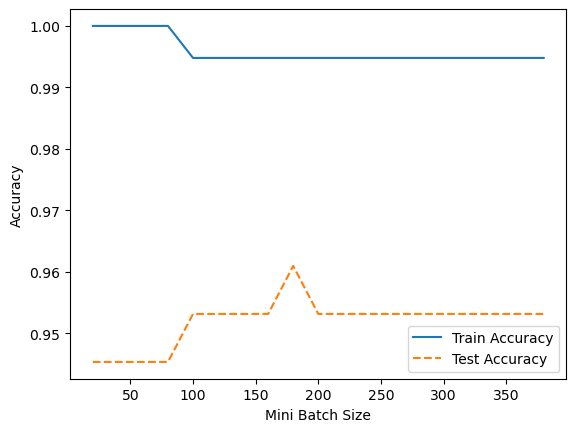

In [19]:
# 모델 정확도 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy");plt.xlabel("Mini Batch Size")
plt.legend()

- train 데이터에서 과적합경향이 보이고 test 데이터 성능에서는 mini batch size 가 180 에서 최대성능을 보이므로 180을 선택함

### 결론 도출
    - 최종 모델 선택

In [20]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes = (20, 20), activation = "relu", solver = "adam", batch_size= 180, random_state = 1234)
nn_final.fit(df_train_x, df_train_y)
y_pred = nn_final.predict(df_test_x)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(nn_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}\n".format(nn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

Train Accuracy: 0.995
Test Accuracy: 0.961

Test Confusion matrix: 
[[31  0]
 [ 5 92]]
              precision    recall  f1-score   support

           0      0.861     1.000     0.925        31
           1      1.000     0.948     0.974        97

    accuracy                          0.961       128
   macro avg      0.931     0.974     0.949       128
weighted avg      0.966     0.961     0.962       128



/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- confusion matrix 결과
- TN = 31 , FP = 0 , FN = 5 , TP = 92
- 정확도(Accuracy) = (TP+TN)/(TP+FP+FN+TN) = 0.953 으로 정분류율이 96.1% 이다.
- 정밀도(Precision) = TP / (TP + FP) = 1
- 재현율(Recall) = TP/(TP+FN) = 0.948
- 특이도(Specificity) = TN/(TN+FP) = 1
- '1' 기준 f1-score = TP/(TP+FP) = 0.974
- 해당 모델은 높은 정확도와 정밀도를 보이고 있으며, Positive 클래스를 잘 분류하는데 성공한 것으로 보인다.
- 다만, 재현율(Recall)은 다른 지표들에 비해 상대적으로 조금 낮게 나타나고 있다. 이것은 Positive 클래스를 실제로 Positive로 분류해야 할 샘플 중에서 약간의 오분류(5개의 FN)가 발생한 것을 의미한다.
- 그러나 전체적으로 좋은 분류라고 할 수 있다.

# 2. KNN 과제

In [21]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler as SS

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

## 데이터 구성 및 확인

In [22]:
df = pd.read_csv('./datasets/유방암.csv',encoding='euc-kr')
display(df.head())

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


## 데이터 결측치, 이상치 확인

In [23]:
display(df.isnull().sum(axis=0).sort_values(ascending=False))

diagnosis                  0
compactness_error          0
worst_symmetry             0
worst_concave_points       0
worst_concavity            0
worst_compactness          0
worst_smoothness           0
worst_area                 0
worst_perimeter            0
worst_texture              0
worst_radius               0
fractal_dimension_error    0
symmetry_error             0
concave_points_error       0
concavity_error            0
smoothness_error           0
mean_radius                0
area_error                 0
perimeter_error            0
texture_error              0
radius_error               0
mean_fractal_dimension     0
mean_symmetry              0
mean_concave_points        0
mean_concavity             0
mean_compactness           0
mean_smoothness            0
mean_area                  0
mean_perimeter             0
mean_texture               0
worst_fractal_dimension    0
dtype: int64

In [24]:
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_음성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,1
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,0
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,1
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,0
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,0


In [25]:
# 데이터 분리 : 설명변수, 목표변수 구분
df_raw_x = df_raw_dummy.drop("diagnosis_음성", axis = 1, inplace = False)
df_raw_y = df_raw_dummy['diagnosis_음성']
display(df_raw_x.head())
display(df_raw_y.head())

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


0    1
1    0
2    1
3    0
4    0
Name: diagnosis_음성, dtype: uint8

## 데이터 스케일링

In [26]:
df_raw_x_num = df_raw_x.select_dtypes(include = "float64")
v_feature_names = df_raw_x_num.columns

scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns = v_feature_names)
display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:", df_x_scaled.head())

'Scale 변환 전:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


'Scale 변환 후:'

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


## test, train 데이터 분할 작업

In [27]:
df_train_x , df_test_x, df_train_y, df_test_y = train_test_split(df_x_scaled,df_raw_y,
                                                                 test_size=0.4,random_state=1234)

## custum 되지않은 KNN

In [28]:
knn_uncust = KNN()
knn_uncust.fit(df_train_x,df_train_y)

print("Train Acc:",knn_uncust.score(df_train_x,df_train_y))
print("Test Acc:",knn_uncust.score(df_test_x,df_test_y))


Train Acc: 0.9583333333333334
Test Acc: 0.921875


- 정확도는 train 95.8% test 92.1% 유사하나 과소적합

In [29]:
print(knn_uncust.get_params().keys())
print(knn_uncust.get_params().values())


dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


## 이웃 수 파라미터 설정

In [30]:
train_acc = []
test_acc = []

para = [i for i in range(1,16)]
for ne in para:
    knn = KNN(n_neighbors=ne)
    knn.fit(df_train_x,df_train_y)
    train_acc.append(knn.score(df_train_x,df_train_y))
    test_acc.append(knn.score(df_test_x,df_test_y))

df_accuracy = pd.DataFrame()
df_accuracy['Neighbors'] = para
df_accuracy['TrainScore'] = train_acc
df_accuracy['TestScore'] = test_acc
print(df_accuracy.round(3))


    Neighbors  TrainScore  TestScore
0           1       1.000      0.953
1           2       0.969      0.914
2           3       0.969      0.914
3           4       0.964      0.906
4           5       0.958      0.922
5           6       0.958      0.898
6           7       0.964      0.906
7           8       0.964      0.906
8           9       0.964      0.930
9          10       0.964      0.914
10         11       0.964      0.914
11         12       0.969      0.898
12         13       0.974      0.898
13         14       0.969      0.906
14         15       0.969      0.914


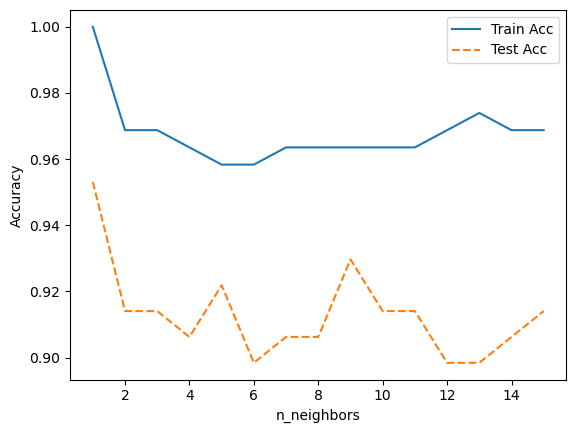

In [31]:
plt.plot(para,train_acc,linestyle='-',label='Train Acc')
plt.plot(para,test_acc,linestyle='--',label='Test Acc')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

- 이웃 수가 1일때 train 모델의 과적합으로 전체 표본 및 특성을 고려하여 9를 선택함
- 이후 이웃 수가 9일때 최대성능을 보임

## 가중치 이웃수 증가 파라미터 성능 확인

In [32]:
train_acc = []
test_acc = []

para = [i for i in range(1,11)] * 2
para_weights = (['uniform'])* 10 + (['distance']*10)

for ne,we in zip(para,para_weights):
    knn = KNN(n_neighbors=ne,weights=we)
    knn.fit(df_train_x,df_train_y)
    train_acc.append(knn.score(df_train_x,df_train_y))
    test_acc.append(knn.score(df_test_x,df_test_y))

df_accuracy = pd.DataFrame()
df_accuracy['Neighbors'] = para
df_accuracy['Weights'] = para_weights
df_accuracy['TrainScore'] = train_acc
df_accuracy['TestScore'] = test_acc
print(df_accuracy.round(3))

    Neighbors   Weights  TrainScore  TestScore
0           1   uniform       1.000      0.953
1           2   uniform       0.969      0.914
2           3   uniform       0.969      0.914
3           4   uniform       0.964      0.906
4           5   uniform       0.958      0.922
5           6   uniform       0.958      0.898
6           7   uniform       0.964      0.906
7           8   uniform       0.964      0.906
8           9   uniform       0.964      0.930
9          10   uniform       0.964      0.914
10          1  distance       1.000      0.953
11          2  distance       1.000      0.953
12          3  distance       1.000      0.914
13          4  distance       1.000      0.922
14          5  distance       1.000      0.922
15          6  distance       1.000      0.930
16          7  distance       1.000      0.906
17          8  distance       1.000      0.914
18          9  distance       1.000      0.930
19         10  distance       1.000      0.922


In [33]:
df_acc_weights_pivot = df_accuracy.pivot(index='Neighbors',columns='Weights',
                                values=['TrainScore','TestScore'])
df_acc_weights_pivot

TrainScore           TestScore          
Weights     distance   uniform  distance   uniform
Neighbors                                         
1                1.0  1.000000  0.953125  0.953125
2                1.0  0.968750  0.953125  0.914062
3                1.0  0.968750  0.914062  0.914062
4                1.0  0.963542  0.921875  0.906250
5                1.0  0.958333  0.921875  0.921875
6                1.0  0.958333  0.929688  0.898438
7                1.0  0.963542  0.906250  0.906250
8                1.0  0.963542  0.914062  0.906250
9                1.0  0.963542  0.929688  0.929688
10               1.0  0.963542  0.921875  0.914062

In [34]:
level0 = df_acc_weights_pivot.columns.get_level_values(0)
level1 = df_acc_weights_pivot.columns.get_level_values(1)

df_acc_weights_pivot.columns = level0 +"-" + level1
df_acc_weights_pivot.head()

,TrainScore-distance,TrainScore-uniform,TestScore-distance,TestScore-uniform
Neighbors,,,,
1,1.0,1.000000,0.953125,0.953125
2,1.0,0.968750,0.953125,0.914062
3,1.0,0.968750,0.914062,0.914062
4,1.0,0.963542,0.921875,0.906250
5,1.0,0.958333,0.921875,0.921875


Text(0, 0.5, 'Accuracy')

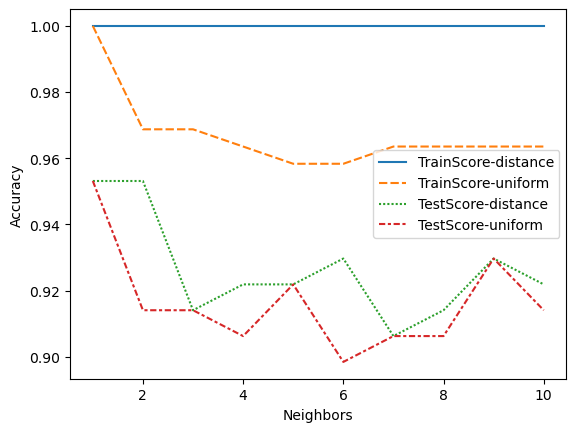

In [35]:
sns.lineplot(data=df_acc_weights_pivot)
plt.ylabel("Accuracy")

In [36]:
train_acc = []
test_acc = []

para = [i for i in range(1,11)]*2
para_m = (['euclidean'])* 10 + (['manhattan']*10)

for (ne,me) in zip(para,para_m):
    knn = KNN(n_neighbors=ne,metric=me,weights='uniform')
    knn.fit(df_train_x,df_train_y)
    train_acc.append(knn.score(df_train_x,df_train_y))
    test_acc.append(knn.score(df_test_x,df_test_y))

df_accuracy2 = pd.DataFrame()
df_accuracy2['Neighbors'] = para
df_accuracy2['Metrics'] = para_m
df_accuracy2['TrainScore'] = train_acc
df_accuracy2['TestScore'] = test_acc
print(df_accuracy.round(3))


    Neighbors   Weights  TrainScore  TestScore
0           1   uniform       1.000      0.953
1           2   uniform       0.969      0.914
2           3   uniform       0.969      0.914
3           4   uniform       0.964      0.906
4           5   uniform       0.958      0.922
5           6   uniform       0.958      0.898
6           7   uniform       0.964      0.906
7           8   uniform       0.964      0.906
8           9   uniform       0.964      0.930
9          10   uniform       0.964      0.914
10          1  distance       1.000      0.953
11          2  distance       1.000      0.953
12          3  distance       1.000      0.914
13          4  distance       1.000      0.922
14          5  distance       1.000      0.922
15          6  distance       1.000      0.930
16          7  distance       1.000      0.906
17          8  distance       1.000      0.914
18          9  distance       1.000      0.930
19         10  distance       1.000      0.922


- TestScore-distance, TestScore-uniform 이 Neighbors = 1 일때 test 데이터가 좋은 성능을 보이나
- 전체 표본과 특성을 고려하여 6을 선택한다.

Text(0, 0.5, 'Accuracy')

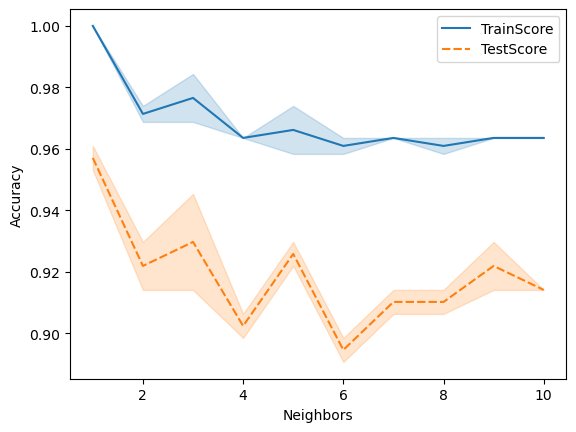

In [37]:
df_acc_metric_pivot = df_accuracy2.pivot(index='Neighbors',columns='Metrics',
                                       values=['TrainScore','TestScore'])
level0 = df_acc_metric_pivot.columns.get_level_values(0)
level1 = df_acc_metric_pivot.columns.get_level_values(1)

df_acc_weights_pivot.columns = level0 +"_" + level1
sns.lineplot(data = df_acc_metric_pivot)
plt.ylabel('Accuracy')

- metric 은 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [38]:
knn_model = KNN(n_neighbors=6, weights='distance',metric='euclidean')
knn_model.fit(df_train_x,df_train_y)
y_pred = knn_model.predict(df_test_x)

print('train data acc:',knn_model.score(df_train_x,df_train_y))
print('test data acc:',knn_model.score(df_test_x,df_test_y))
print(' Confusion matrix\n','     ㅣ     \n',
      '     ㅣ     \n','      ▿     \n',confusion_matrix(df_test_y,y_pred))
print(classification_report(df_test_y,y_pred,digits=3))

train data acc: 1.0
test data acc: 0.9296875
 Confusion matrix
      ㅣ     
      ㅣ     
       ▿     
 [[29  2]
 [ 7 90]]
              precision    recall  f1-score   support

           0      0.806     0.935     0.866        31
           1      0.978     0.928     0.952        97

    accuracy                          0.930       128
   macro avg      0.892     0.932     0.909       128
weighted avg      0.936     0.930     0.931       128



- confusion matrix 결과
- TN = 29 , FP = 2 , FN = 7 , TP = 90
- 정확도(Accuracy) = (TP+TN)/(TP+FP+FN+TN) = 0.929 으로 정분류율이 92.9% 이다.
- 정밀도(Precision) = TP / (TP + FP) = 0.978
- 재현율(Recall) = TP/(TP+FN) = 0.928
- 특이도(Specificity) = TN/(TN+FP) = 0.935
- '1' 기준 f1-score = TP/(TP+FP) = 0.952
- 해당 모델은 높은 정확도와 정밀도를 보이고 있으며, Positive 클래스를 잘 분류하는데 성공한 것으로 보인다.
- 다만, 재현율(Recall)은 다른 지표들에 비해 상대적으로 조금 낮게 나타나고 있다. 이것은 Positive 클래스를 실제로 Positive로 분류해야 할 샘플 중에서 약간의 오분류(7개의 FN)가 발생한 것을 의미한다.
- 그러나 전체적으로 좋은 분류라고 할 수 있다.